In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [40]:
# 1. Handle duplicate data in student dataset:
# a. In student dataset duplicate data is if you have:
#    i. Different student rows with the same email
#
# b. In case you find duplicate data, remove the student with less
# information. Make sure you change associations in other
# data sets to the duplicated student id so your data will still be
# accurate.
# For example → If you choose to remove student_id 3
# because it's duplicated with student_id 5, make sure to
# change any association in other data sets from student_id 3
# to student_id 5.

students_df = pd.read_csv('students.csv')
students_df

# display(students_df)

# 1
# find dup
dup_students = students_df[students_df['email'].duplicated(keep=False)].sort_values('email')
dup_students

# how many NaN in each row lets calc
dup_students['non_nan_count'] = dup_students.notna().sum(axis=1)
dup_students

# lets sort first by email, then by count
dup_students.sort_values(['email', 'non_nan_count'], inplace=True, ascending=[True, False])
display('the duplicates', dup_students)

# now remove dupl, keep only first with highest non-nan-rate
# also keep the rmoved items
kept = dup_students.drop_duplicates(subset=['email'], keep='first')
removed = dup_students[~dup_students['id'].isin(kept['id'])]
dup_students.drop_duplicates(subset=['email'], keep='first', inplace=True)
display('after remove', dup_students)
display('the removed', removed)
display('the kept', kept)

# continue in next cell


'the duplicates'

,id,first_name,last_name,gender,age,city,education,email,non_nan_count
26,27,Kaitlynn,Tansley,Female,39.0,Ashkelon,No education,ktansleyq@soup.io,8
72,73,Jermaine,Gabey,Female,36.0,Jerusalem,Bachelor's degree,ktansleyq@soup.io,8
38,39,Neil,Lipson,Male,27.0,Ashkelon,High school,nlipson12@foxnews.com,8
90,91,Opaline,Satterlee,Female,34.0,Tel Aviv,Master's degree,nlipson12@foxnews.com,8
15,16,Sheffie,Fullom,Male,41.0,Haifa,Bachelor's degree,sfullomf@wp.com,8
65,66,Juieta,Bodycote,Female,37.0,Ashkelon,No education,sfullomf@wp.com,8
205,206,Cesar,Lghan,Male,NaN,Tel Aviv,High school,sfullomf@wp.com,7
88,89,Danny,Haythorne,Male,42.0,Tel Aviv,No education,wthirstw@youku.com,8
32,33,Wileen,Thirst,NaN,48.0,Ashkelon,High school,wthirstw@youku.com,7


'after remove'

,id,first_name,last_name,gender,age,city,education,email,non_nan_count
26,27,Kaitlynn,Tansley,Female,39.0,Ashkelon,No education,ktansleyq@soup.io,8
38,39,Neil,Lipson,Male,27.0,Ashkelon,High school,nlipson12@foxnews.com,8
15,16,Sheffie,Fullom,Male,41.0,Haifa,Bachelor's degree,sfullomf@wp.com,8
88,89,Danny,Haythorne,Male,42.0,Tel Aviv,No education,wthirstw@youku.com,8


'the removed'

,id,first_name,last_name,gender,age,city,education,email,non_nan_count
72,73,Jermaine,Gabey,Female,36.0,Jerusalem,Bachelor's degree,ktansleyq@soup.io,8
90,91,Opaline,Satterlee,Female,34.0,Tel Aviv,Master's degree,nlipson12@foxnews.com,8
65,66,Juieta,Bodycote,Female,37.0,Ashkelon,No education,sfullomf@wp.com,8
205,206,Cesar,Lghan,Male,NaN,Tel Aviv,High school,sfullomf@wp.com,7
32,33,Wileen,Thirst,NaN,48.0,Ashkelon,High school,wthirstw@youku.com,7


'the kept'

,id,first_name,last_name,gender,age,city,education,email,non_nan_count
26,27,Kaitlynn,Tansley,Female,39.0,Ashkelon,No education,ktansleyq@soup.io,8
38,39,Neil,Lipson,Male,27.0,Ashkelon,High school,nlipson12@foxnews.com,8
15,16,Sheffie,Fullom,Male,41.0,Haifa,Bachelor's degree,sfullomf@wp.com,8
88,89,Danny,Haythorne,Male,42.0,Tel Aviv,No education,wthirstw@youku.com,8


In [63]:
courses_df = pd.read_csv('courses.csv')
courses_df

# using kept and removed from previous ...
# kept Index([26, 38, 15, 88], dtype='int64')
# removed Index([72, 90, 65, 205, 32], dtype='int64')

student_course_df = pd.read_csv('studnet_course.csv')
# display(student_course_df)

# modify all removed ids with kewpt ids
student_course_df.sort_values('student_id', inplace=True)
print('kept', kept['id'].values)
print('removed', removed['id'].values)
student_course_df[student_course_df['student_id'].isin(removed['id'])]

# 1 
# need to make a dict { [id-remove]: id-kept } -- to rename all the student_id of the removed..
# we can make manullay the dict for replace
# i.e. df.replace({10: 40, 20: 40}, inplace=True)
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
# student_course_df.replace({
#     73: 27,  # Replace id 73 with 27
#     91: 39,  # Replace id 91 with 39
#     66: 15,  # Replace id 66 with 15
#     206: 15, # Replace id 206 with 15
#     33: 89   # Replace id 33 with 89
# })
# 2 by script
# merge between removed and kept
# pd.set_option('display.max_rows', None) -- jump to index 33 (after 32) and you will see its 89 
# pd.reset_option('display.max_rows')
merged_dup = removed.merge(kept, how='inner', on='email', suffixes=('_removed', '_kept'))
mapping = dict(zip(merged_dup['id_removed'], merged_dup['id_kept']))
pd.set_option('display.max_rows', None)
display(student_course_df.replace(mapping))

# now remove from the students_df
display(students_df.drop_duplicates(subset=['email'], keep='first'))


kept [27 39 16 89]
removed [ 73  91  66 206  33]


,id,student_id,course_id,final_grade
333,334,1,38,75.0
140,141,1,47,63.0
773,774,2,32,16.0
250,251,2,44,74.0
189,190,2,40,74.0
232,233,2,21,49.0
548,549,3,18,72.0
33,34,4,37,27.0
679,680,4,24,90.0
659,660,5,32,78.0


,id,first_name,last_name,gender,age,city,education,email
0,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn
1,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov
2,3,Colin,Tite,NaN,NaN,Petah Tikva,High school,ctite2@businessinsider.com
3,4,Jonis,Iston,Female,40.0,Jerusalem,High school,jiston3@edublogs.org
4,5,Dex,Goodson,Male,43.0,Haifa,Bachelor's degree,dgoodson4@e-recht24.de
5,6,Marysa,Ovenden,Female,24.0,Haifa,High school,movenden5@zdnet.com
6,7,Fidelia,Bolver,Female,39.0,Jerusalem,No education,fbolver6@weebly.com
7,8,Wyn,Trassler,Male,37.0,Holon,Bachelor's degree,wtrassler7@google.fr
8,9,Bert,Persse,Female,31.0,Kfar Saba,High school,bpersse8@shop-pro.jp
9,10,Wilona,Mangenot,NaN,39.0,Haifa,Bachelor's degree,wmangenot9@wisc.edu


In [168]:
# 2. Handle missing data in all datasets:
# a. In case the missing data in a specific column is above 5% of
# all provided data rows fill the missing data with a default valid
# value of your choice.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

################################################### per column

# explore na
# students_df.isna() # shows bool 
# but how can i see columns which have na
# lets explore gender 
students_df['gender'].notna().sum() # 435
students_df['gender'].isna().sum() # 65 -- check in excel filter by no value and then click 'id' column A and look at count

# lets do this for all columns
students_df.notna().sum(axis=0) # could also simply se count
# id            500
# first_name    500
# last_name     500
# gender        435 <--
# age           471 <--
# city          500
# education     500
# email         500

students_df.shape[0]
students_df.notna().sum(axis=0) / students_df.shape[0] * 100
# id            100.0
# first_name    100.0
# last_name     100.0
# gender         87.0
# age            94.2
# city          100.0
# education     100.0
# email         100.0
100 - students_df.notna().sum(axis=0) / students_df.shape[0] * 100
# id             0.0
# first_name     0.0
# last_name      0.0
# gender        13.0 <--
# age            5.8 <--
# city           0.0
# education      0.0
# email          0.0
perc_columns = 100 - students_df.notna().sum(axis=0) / students_df.shape[0] * 100
# change to 60% to show works on 2 columns. change back to 6% !!!!!!!!!!!!!! **************
replace_columns = perc_columns[(perc_columns > 0) & (perc_columns < 60)]  
students_df[replace_columns.index].isna()

# 1
# just change manually
# students_df_copy = students_df.copy()
# age_mean = students_df_copy['age'].mean()
# students_df_copy['age'] = students_df_copy['age'].fillna(age_mean)
# display('manually', students_df_copy.head())

# 2 script
# test
# students_df[students_df[replace_columns.index].isna()] = 1
# students_df
# students_df['gender'].value_counts().sort_values(ascending=False)
# students_df['gender'].value_counts().sort_values(ascending=False).index[0]
# print(students_df['age'].value_counts().sort_values(ascending=False))
# print(students_df['age'].value_counts().sort_values(ascending=False).index[0])
display(students_df)
for col in replace_columns.index:
    # print(col)
    # print(students_df[col].value_counts().sort_values(ascending=False))
    # print(students_df[col].value_counts().sort_values(ascending=False).index[0])
    max_occur_value = students_df[col].value_counts().sort_values(ascending=False).index[0]
    students_df[col] = students_df[col].fillna(max_occur_value)
students_df


,id,first_name,last_name,gender,age,city,education,email
0,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn
1,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov
2,3,Colin,Tite,NaN,NaN,Petah Tikva,High school,ctite2@businessinsider.com
3,4,Jonis,Iston,Female,40.0,Jerusalem,High school,jiston3@edublogs.org
4,5,Dex,Goodson,Male,43.0,Haifa,Bachelor's degree,dgoodson4@e-recht24.de
...,...,...,...,...,...,...,...,...
495,496,Karoly,Ferreres,Female,29.0,Haifa,High school,kferreresdr@amazon.de
496,497,Rivkah,Androlli,Female,43.0,Haifa,No education,randrollids@is.gd
497,498,Melisandra,Screen,Female,34.0,Haifa,High school,mscreendt@booking.com
498,499,Delmer,Alpin,Male,NaN,Haifa,High school,dalpindu@cloudflare.com


,id,first_name,last_name,gender,age,city,education,email
0,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn
1,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov
2,3,Colin,Tite,NaN,37.0,Petah Tikva,High school,ctite2@businessinsider.com
3,4,Jonis,Iston,Female,40.0,Jerusalem,High school,jiston3@edublogs.org
4,5,Dex,Goodson,Male,43.0,Haifa,Bachelor's degree,dgoodson4@e-recht24.de
...,...,...,...,...,...,...,...,...
495,496,Karoly,Ferreres,Female,29.0,Haifa,High school,kferreresdr@amazon.de
496,497,Rivkah,Androlli,Female,43.0,Haifa,No education,randrollids@is.gd
497,498,Melisandra,Screen,Female,34.0,Haifa,High school,mscreendt@booking.com
498,499,Delmer,Alpin,Male,37.0,Haifa,High school,dalpindu@cloudflare.com


In [239]:
# b. In case the missing data is below 5% remove the row from
# your calculations and make sure to adjust your other
# datasets accordingly.
# c. In case you found a row with missing data with a mandatory
# column (like id, name, etc...) remove this row from your
# dataset.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

################################################### per row

# explore
teachers_df[teachers_df.isna().sum(axis=1) > 0]
student_course_df[student_course_df.isna().sum(axis=1) > 0]
courses_df[courses_df.isna().sum(axis=1) > 0]
students_df[students_df.isna().sum(axis=1) > 0] # best

nans_only = students_df.copy()
nans_only = nans_only[nans_only.isna().sum(axis=1) > 0]

nans_only['count_nan_perc %'] = nans_only.isna().sum(axis=1) / len(nans_only.columns) * 100
nans_only['count_nan'] = nans_only.isna().sum(axis=1)
nans_only.sort_values('count_nan', ascending=False)
display(nans_only[nans_only['count_nan_perc %'] > 15])
# display(nans_only[nans_only['count_nan_perc %'] > 15])
print('IDs ------------------', list(nans_only[nans_only['count_nan_perc %'] > 15]['id']))
display(students_df.drop(nans_only[nans_only['count_nan_perc %'] > 15].index))

# remove student courses with the nan students_id
display('no 3, no 26', student_course_df.drop(student_course_df[student_course_df['student_id'].isin(nans_only['id'].unique())].index).\
        sort_values('student_id').head(50).drop_duplicates(subset=['student_id']))

,id,first_name,last_name,gender,age,city,education,email,count_nan_perc %,count_nan
2,3,Colin,Tite,NaN,NaN,Petah Tikva,High school,ctite2@businessinsider.com,25.0,2
25,26,Cher,Auld,NaN,NaN,Haifa,High school,cauldp@addthis.com,25.0,2
230,231,Eliza,Mordy,NaN,NaN,Tel Aviv,Bachelor's degree,emordy6e@bravesites.com,25.0,2
267,268,Cymbre,Jorissen,NaN,NaN,Haifa,High school,cjorissen7f@ezinearticles.com,25.0,2
286,287,Valeda,Paal,NaN,NaN,Tel Aviv,No education,vpaal7y@oakley.com,25.0,2


IDs ------------------ [3, 26, 231, 268, 287]


,id,first_name,last_name,gender,age,city,education,email
0,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn
1,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov
3,4,Jonis,Iston,Female,40.0,Jerusalem,High school,jiston3@edublogs.org
4,5,Dex,Goodson,Male,43.0,Haifa,Bachelor's degree,dgoodson4@e-recht24.de
5,6,Marysa,Ovenden,Female,24.0,Haifa,High school,movenden5@zdnet.com
...,...,...,...,...,...,...,...,...
495,496,Karoly,Ferreres,Female,29.0,Haifa,High school,kferreresdr@amazon.de
496,497,Rivkah,Androlli,Female,43.0,Haifa,No education,randrollids@is.gd
497,498,Melisandra,Screen,Female,34.0,Haifa,High school,mscreendt@booking.com
498,499,Delmer,Alpin,Male,NaN,Haifa,High school,dalpindu@cloudflare.com


'no 3, no 26'

,id,student_id,course_id,final_grade
333,334,1,38,75.0
189,190,2,40,74.0
33,34,4,37,73.0
659,660,5,32,78.0
919,920,6,26,69.0
542,543,7,17,74.0
383,384,8,16,64.0
377,378,9,26,71.0
314,315,12,9,61.0
401,402,13,26,60.0


In [261]:
# c. In case you found a row with missing data with a mandatory
# column (like id, name, etc...) remove this row from your
# dataset.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

################################################### per row

# explore
teachers_df[teachers_df.isna().sum(axis=1) > 0]
student_course_df[student_course_df.isna().sum(axis=1) > 0]
courses_df[courses_df.isna().sum(axis=1) > 0]
students_df[students_df.isna().sum(axis=1) > 0] # best

nans_only = students_df.copy()
nans_only = nans_only[nans_only.isna().sum(axis=1) > 0]
display(nans_only)

age_nans_only = students_df.copy()
age_nans_only = age_nans_only[age_nans_only['age'].isna()]
display('head 5 age nan', age_nans_only.head())

display('drop age nan', students_df.drop(students_df[students_df['age'].isna()].index))

# drop if age is missing
student_course_df.drop(student_course_df[student_course_df['student_id'].isin(age_nans_only['id'].values)].index).sort_values('student_id').\
    sort_values('student_id').head(50).drop_duplicates(subset=['student_id'])

,id,first_name,last_name,gender,age,city,education,email
2,3,Colin,Tite,NaN,NaN,Petah Tikva,High school,ctite2@businessinsider.com
9,10,Wilona,Mangenot,NaN,39.0,Haifa,Bachelor's degree,wmangenot9@wisc.edu
10,11,Renata,Mynett,Female,NaN,Tel Aviv,No education,rmynetta@blogspot.com
14,15,Warner,Gres,NaN,48.0,Tel Aviv,High school,wgrese@ucoz.com
17,18,Dory,MacFarland,NaN,24.0,Rishon LeZion,High school,dmacfarlandh@census.gov
...,...,...,...,...,...,...,...,...
481,482,Elana,Hydes,Female,NaN,Jerusalem,No education,ehydesdd@blinklist.com
484,485,Selle,Tatton,NaN,40.0,Ashkelon,High school,stattondg@scribd.com
488,489,Gabbey,Leathers,NaN,20.0,Haifa,Doctoral degree,gleathersdk@cargocollective.com
492,493,Cullan,Vaggs,NaN,54.0,Jerusalem,High school,cvaggsdo@jiathis.com


'head 5 age nan'

,id,first_name,last_name,gender,age,city,education,email
2,3,Colin,Tite,NaN,NaN,Petah Tikva,High school,ctite2@businessinsider.com
10,11,Renata,Mynett,Female,NaN,Tel Aviv,No education,rmynetta@blogspot.com
25,26,Cher,Auld,NaN,NaN,Haifa,High school,cauldp@addthis.com
51,52,Waldo,Marcham,Male,NaN,Tel Aviv,Master's degree,wmarcham1f@bizjournals.com
59,60,Krysta,Birdsey,Female,NaN,Tel Aviv,High school,kbirdsey1n@jigsy.com


'drop age nan'

,id,first_name,last_name,gender,age,city,education,email
0,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn
1,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov
3,4,Jonis,Iston,Female,40.0,Jerusalem,High school,jiston3@edublogs.org
4,5,Dex,Goodson,Male,43.0,Haifa,Bachelor's degree,dgoodson4@e-recht24.de
5,6,Marysa,Ovenden,Female,24.0,Haifa,High school,movenden5@zdnet.com
...,...,...,...,...,...,...,...,...
494,495,Lucien,Spreckley,Male,29.0,Tel Aviv,High school,lspreckleydq@123-reg.co.uk
495,496,Karoly,Ferreres,Female,29.0,Haifa,High school,kferreresdr@amazon.de
496,497,Rivkah,Androlli,Female,43.0,Haifa,No education,randrollids@is.gd
497,498,Melisandra,Screen,Female,34.0,Haifa,High school,mscreendt@booking.com


,id,student_id,course_id,final_grade
140,141,1,47,63.0
773,774,2,32,66.0
679,680,4,24,90.0
659,660,5,32,78.0
919,920,6,26,69.0
501,502,7,6,60.0
383,384,8,16,64.0
831,832,9,14,63.0
95,96,10,4,66.0
314,315,12,9,61.0


gender
Male      210
Female    201
Name: count, dtype: int64

city
Tel Aviv     89
Haifa        70
Jerusalem    55
Name: count, dtype: int64

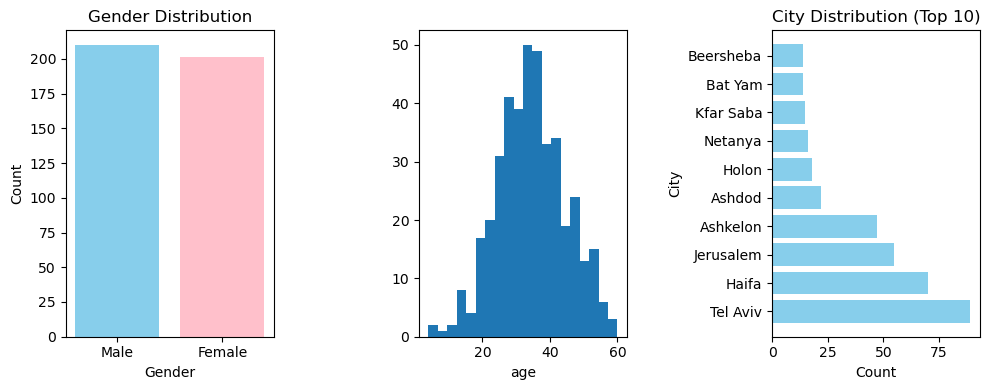

In [294]:
# Data analysis:
# Use the copy() datasets from your data preparation answer and answer
# the following questions:
# 1. Explore the students.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:
#     a. Count the number of students by gender, show a dataframe
#         with each gender type and how many students we have from
#         that type.
#         Plot bar chart to visualize your result.
#     b. Plot the student ages distribution with histogram chart.
#     c. Find what is the city with the highest number of registered
#         students and what is the city with the lowest number of
#         registered students.


pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))


# display('drop age nan', students_df.drop(students_df[students_df['age'].isna()].index))
# display('drop age nan', students_df.dropna(subset=['age']))
students_df.dropna(subset=['age'], inplace=True)
students_df.dropna(subset=['gender'], inplace=True)

# Count the number of students by gender, show a dataframe

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
count_by_gender = students_df['gender'].value_counts()
display(count_by_gender)

ax_gender = axes[0]
ax_gender.bar(count_by_gender.index, count_by_gender.values, color = {'pink', 'skyblue'})
ax_gender.set_xlabel("Gender")
ax_gender.set_ylabel("Count")
ax_gender.set_title("Gender Distribution")

# Plot the student ages distribution with histogram chart.
ax_age = axes[1]
ax_age.hist(students_df['age'], bins=20)
ax_age.set_xlabel("age")

count_by_city = students_df['city'].value_counts().sort_values(ascending=False)
display(count_by_city.head(3))

ax_city = axes[2]
# Plot as a bar chart
ax_city.barh(count_by_city.index[:10], count_by_city.values[:10], color='skyblue')  # Top 10 cities
ax_city.set_xlabel("Count")
ax_city.set_ylabel("City")
ax_city.set_title("City Distribution (Top 10)")

plt.tight_layout(w_pad=3)
plt.show()

,Course Count
course_category,
Data Science & Security,9
Product & Business Strategy,8
Software Development,33


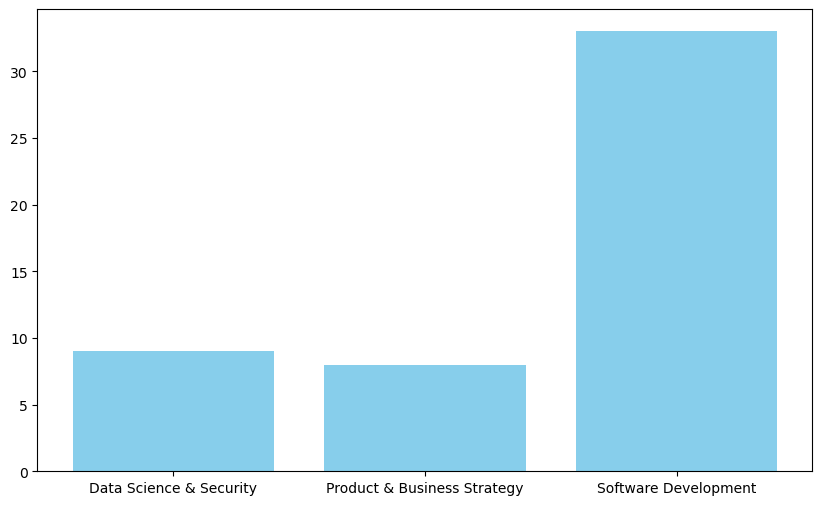

In [387]:
# 2. Explore the coursres.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:
#     a. Count the number of courses by category, show a dataframe
#         with each category and how many courses are associated
#         with that category.
#         Plot bar chart to visualize your result.

# opened courses during each month (x-axis should be month
# date and y-axis should be number of courses in each month)

students_df.dropna(subset=['age'], inplace=True)
students_df.dropna(subset=['gender'], inplace=True)
pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

students_df.dropna(subset=['age'], inplace=True)
students_df.dropna(subset=['gender'], inplace=True)

course_counts = courses_df.groupby('course_category').agg({'course_category': 'count'})
course_counts.columns = ['Course Count']
display(course_counts)

plt.figure(figsize=(10, 6))
plt.bar(x=course_counts.index, height=course_counts['Course Count'],  color='skyblue')
plt.show()

In [353]:
# 2. Explore the coursres.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:

#      b. Create a dataframe that shows for each category what are
#         the unique courses names that are associated with that
#         category.

# opened courses during each month (x-axis should be month
# date and y-axis should be number of courses in each month)

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

# here na pala
# 1
courses_df.groupby(['course_category', 'course_name']).count()
#courses_df['course_category'].unique()
categ = courses_df['course_category'].unique()
names = pd.DataFrame(data=categ, columns=['course category'])
names['courses'] = [n for n in categ]
#list(courses_df[courses_df['course_category'] == 'Software Development']['course_name'].unique())
names['courses'] = [",".join(list(courses_df[courses_df['course_category'] == n]['course_name'].unique())) for n in categ]
display(names)
# 2
courses_df[['course_category', 'course_name']].drop_duplicates()



,course category,courses
0,Software Development,"Full Stack Developer,AI Developer,DevOps Engin..."
1,Data Science & Security,Cyber
2,Product & Business Strategy,Product Manager


,course_category,course_name
0,Software Development,Full Stack Developer
1,Data Science & Security,Cyber
2,Product & Business Strategy,Product Manager
3,Software Development,AI Developer
4,Software Development,DevOps Engineer
13,Software Development,QA


course_start_date
2023-01-31    2
2023-02-28    4
2023-03-31    3
2023-04-30    8
2023-05-31    2
2023-06-30    4
2023-07-31    1
2023-08-31    2
2023-09-30    7
2023-10-31    6
2023-11-30    4
2023-12-31    7
Freq: M, dtype: int64

,course_id,course_name,course_category,teacher_id
course_start_date,,,,
2023-01-14,32,Product Manager,Product & Business Strategy,28.0
2023-01-23,5,DevOps Engineer,Software Development,21.0
2023-02-08,41,DevOps Engineer,Software Development,25.0
2023-02-15,16,DevOps Engineer,Software Development,NaN
2023-02-21,37,AI Developer,Software Development,5.0
2023-02-24,34,Cyber,Data Science & Security,25.0
2023-03-02,49,Cyber,Data Science & Security,29.0
2023-03-04,44,AI Developer,Software Development,5.0
2023-03-25,8,AI Developer,Software Development,14.0


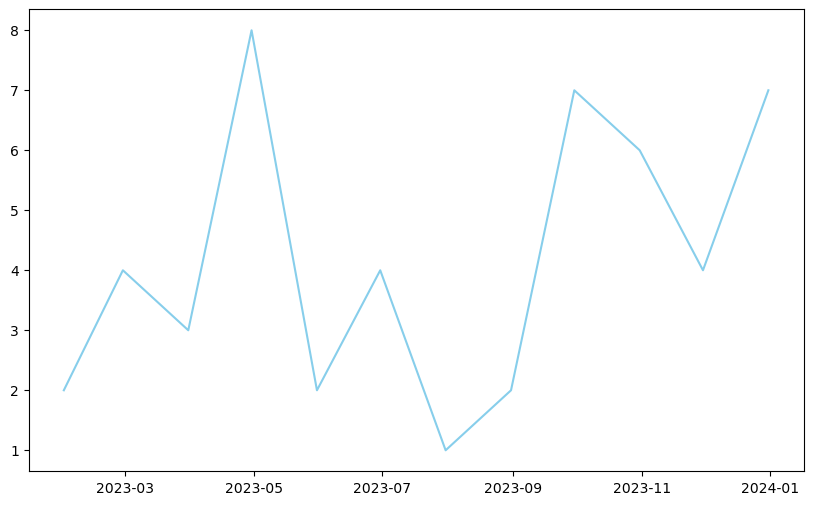

In [395]:
# 2. Explore the coursres.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:
#      c. Create a dataframe that shows how many different courses
#         have been started in each month during 2023 year.
#      d. Use the dataframe from the previous exercise (2.c) and
#         create a line chart that represent the trend of the number of

# opened courses during each month (x-axis should be month
# date and y-axis should be number of courses in each month)

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

# here na pala
# c. Create a dataframe that shows how many different courses
#    have been started in each month during 2023 year.
# res = courses_df.groupby('course_start_date').size()

courses_df['course_start_date'] = pd.to_datetime(courses_df['course_start_date'])
courses_df.set_index('course_start_date', inplace=True)

measure_2023 = courses_df[(courses_df.index.year == 2023)].resample(rule='M').size()
display(measure_2023)
display(courses_df.sort_index().head(10))

plt.figure(figsize=(10, 6))
#sns.lineplot(x=measure_2023.index, y=measure_2023.values,  color='skyblue')
plt.plot(measure_2023.index, measure_2023.values,  color='skyblue')
plt.show()


,id,first_name,last_name,gender,years_of_experience,salary
0,1,Madlen,Conybear,Female,6,27600.0
1,2,Arty,Noonan,Male,1,12600.0
2,3,Jillayne,Younger,Female,4,22000.0
3,4,Tamarah,Hulcoop,Female,4,21600.0
4,5,Kennett,Bugdale,Male,8,33900.0


'no dups'

,id,first_name,last_name,gender,years_of_experience,salary


'mean salary'

'26,721.88'

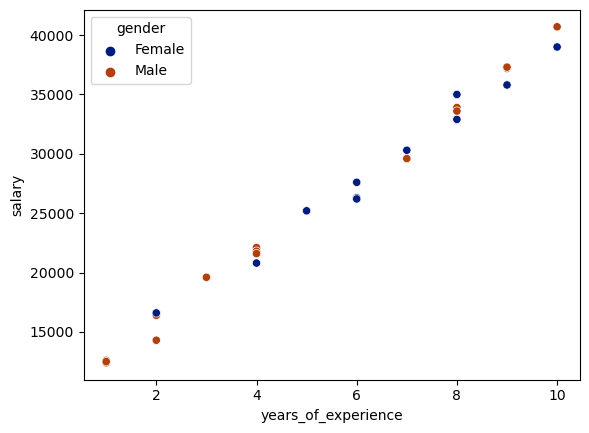

In [414]:
# 3
# Explore the teachers.csv dataset and answer the following
# questions, base your answers with data calculations and
# visualizations if needed:
# a. Calculate the mean salary for a teacher in the college.
# b. Plot a scatter plot to find out the correlation between the
# teacher years of experience and its salary.
# Determine according to the plot if there is any correlation
# between them.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
display(teachers_df.head(5))

display('no dups', teachers_df[teachers_df[['first_name', 'last_name']].duplicated()])
display('mean salary', f"{teachers_df['salary'].mean():,.2f}")

sns.scatterplot(x=teachers_df['years_of_experience'], y=teachers_df['salary'], hue=teachers_df['gender'], palette='dark')
plt.show()


teacher_id
3.0     3
21.0    3
9.0     3
20.0    3
5.0     3
Name: count, dtype: int64

'max'

3

'maxes'

Index([3.0, 5.0, 21.0, 9.0, 20.0], dtype='float64', name='teacher_id')

,id,first_name,last_name,gender,years_of_experience,salary
2,3,Jillayne,Younger,Female,4,22000.0
4,5,Kennett,Bugdale,Male,8,33900.0
8,9,Mona,Hallihan,Female,3,NaN
19,20,Gabriello,Jancso,Male,2,16400.0
20,21,Desirae,Grishunin,Female,6,26300.0


,id,student_id,course_id,final_grade
0,1,247,26,81.0
1,2,113,11,NaN
2,3,125,4,63.0
3,4,455,50,72.0
4,5,140,9,59.0
...,...,...,...,...
995,996,48,39,NaN
996,997,269,35,85.0
997,998,75,42,78.0
998,999,21,4,69.0


,id_x,student_id,course_id,final_grade,id_y,first_name,last_name,gender,age,city,education,email
0,1,247,26,81.0,247,Loren,Shinfield,Male,48.0,Tel Aviv,No education,lshinfield6u@barnesandnoble.com
1,980,247,35,71.0,247,Loren,Shinfield,Male,48.0,Tel Aviv,No education,lshinfield6u@barnesandnoble.com
2,2,113,11,NaN,113,Daffie,Rickerd,Female,42.0,Tel Aviv,Doctoral degree,drickerd34@elpais.com
3,3,125,4,63.0,125,Lindsy,Stuchbury,NaN,51.0,Tel Aviv,High school,lstuchbury3g@google.pl
4,118,125,22,NaN,125,Lindsy,Stuchbury,NaN,51.0,Tel Aviv,High school,lstuchbury3g@google.pl


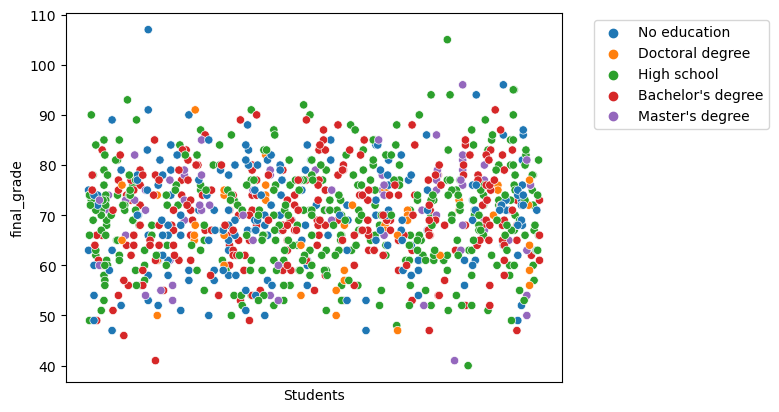

In [476]:
# 4. Use all datasets and answer the following questions:
# a. Find the id, name and salary of the teacher that is teaching
# the most courses during 2023 year.
# In case there are multiple teachers, include them all in your
# answer.
# b. Investigate if there is a linear trend between student
# education level and student grade in the course.
# Use a scatter plot to support your answer.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

################### a
courses_df['course_start_date'] = pd.to_datetime(courses_df['course_start_date'])
courses_2023 = courses_df[courses_df['course_start_date'].dt.year == 2023]
merged = courses_2023.merge(teachers_df, how='inner', left_on='teacher_id', right_on='id')
#merged.groupby(['teacher_id']).count()
#merged.set_index(['teacher_id']).sort_index()
display(merged['teacher_id'].value_counts().sort_values(ascending=False).head())
display('max', merged['teacher_id'].value_counts().sort_values(ascending=False).values[0])
# also
# merged['teacher_id'].value_counts().max()
count_courses = merged['teacher_id'].value_counts()
maxes = count_courses[count_courses == 3].index
display('maxes', maxes)
display(teachers_df[teachers_df['id'].isin(maxes)])

# show all courses 
# display(merged.sort_values('teacher_id').head())
# display(merged[merged['teacher_id'].isin(maxes)])

################### b
display(student_course_df)
merged_stduents = student_course_df.merge(students_df, how='inner', left_on='student_id', right_on='id')
display(merged_stduents.head())

sns.scatterplot(x=merged_stduents['student_id'], y=merged_stduents['final_grade'], hue=merged_stduents['education'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Students")
plt.xticks([])  
# better ?
# sns.boxplot(x=merged_stduents['education'], y=merged_stduents['final_grade'])
# plt.xlabel("Education Level")
# plt.ylabel("Final Grade")
# plt.title("Distribution of Grades by Education Level")
# plt.xticks(rotation=45)
# plt.show()

plt.show()

,id,student_id,course_id,final_grade
0,1,247,26,81.0
1,2,113,11,NaN
2,3,125,4,63.0
3,4,455,50,72.0
4,5,140,9,59.0


,course_id,course_name,course_category,teacher_id,course_start_date,mean_grade
0,1,Full Stack Developer,Software Development,30.0,2023-08-17,69.473934
1,2,Cyber,Data Science & Security,NaN,2023-11-27,70.079268
2,3,Product Manager,Product & Business Strategy,14.0,2023-06-28,69.622517
3,4,AI Developer,Software Development,16.0,2023-11-21,70.062271
4,5,DevOps Engineer,Software Development,21.0,2023-01-23,69.121951


,course_id,course_category,teacher_id,course_start_date,mean_grade
course_name,,,,,
AI Developer,4,Software Development,16.0,2023-11-21,70.062271
Cyber,2,Data Science & Security,9.0,2023-11-27,70.079268
DevOps Engineer,5,Software Development,21.0,2023-01-23,69.121951
Full Stack Developer,1,Software Development,30.0,2023-08-17,69.473934
Product Manager,3,Product & Business Strategy,14.0,2023-06-28,69.622517
QA,14,Software Development,1.0,2023-12-19,67.812500


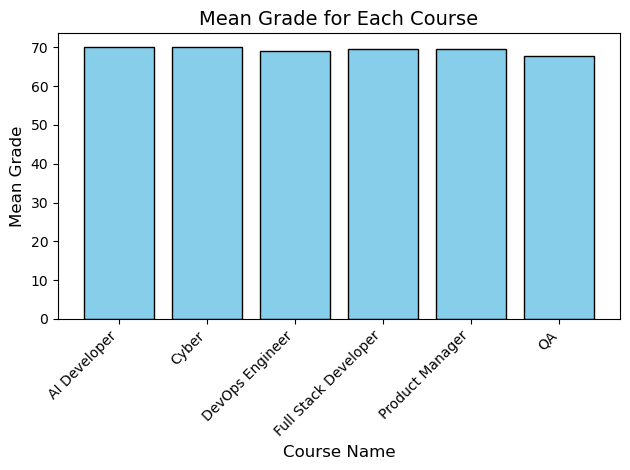

In [508]:
# 4. Use all datasets and answer the following questions:
# c. Find for each course name (during the entire year) what was
# the mean grade.
# Plot a bar chart that represent your answer

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))


################### c
grades_per_course = student_course_df.merge(courses_df, how='inner', on='course_id')
# as_index=False , to get a df and not series
mean_grades = grades_per_course.groupby('course_name', as_index=False)['final_grade'].mean(numeric_only=True)
#type(mean_grades)
courses_with_mean = courses_df.merge(mean_grades, on='course_name', how='left').rename(columns={'final_grade': 'mean_grade'})
display(courses_with_mean.head())
no_dup = courses_with_mean.groupby('course_name').first()
display(no_dup)

plt.bar(no_dup.index, no_dup['mean_grade'], color='skyblue', edgecolor='black')
plt.xlabel('Course Name', fontsize=12)
plt.ylabel('Mean Grade', fontsize=12)
plt.title('Mean Grade for Each Course', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


In [522]:
# 4. Use all datasets and answer the following questions:
# d. Create a new dataframe that shows for each student what is
# its final_college_grade.
# final_college_grade is the mean grade that a specific student
# got in all of his courses together.
# If a student performs the same course more than once, take
# in your calculation the higher grade for that course.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))


################### d
merged_grades = student_course_df.merge(courses_df, how='inner', on='course_id')
final_college_grade = merged_grades.groupby(['student_id', 'course_name'], as_index=False)['final_grade'].max()
display(final_college_grade.head())
mean_final = final_college_grade.groupby('student_id', as_index=False)['final_grade'].mean().rename(columns={'final_grade': 'final_college_grade'})
mean_final.merge(students_df, how='inner', left_on='student_id', right_on='id')

# grades_per_course = student_course_df.merge(courses_df, how='inner', on='course_id')
# # as_index=False , to get a df and not series
# mean_grades = grades_per_course.groupby('course_name', as_index=False)['final_grade'].mean(numeric_only=True)
# #type(mean_grades)
# courses_with_mean = courses_df.merge(mean_grades, on='course_name', how='left').rename(columns={'final_grade': 'mean_grade'})
# display(courses_with_mean.head())
# no_dup = courses_with_mean.groupby('course_name').first()
# display(no_dup)

# plt.bar(no_dup.index, no_dup['mean_grade'], color='skyblue', edgecolor='black')
# plt.xlabel('Course Name', fontsize=12)
# plt.ylabel('Mean Grade', fontsize=12)
# plt.title('Mean Grade for Each Course', fontsize=14)
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.tight_layout()  # Adjust layout to fit everything nicely
# plt.show()


,student_id,course_name,final_grade
0,1,AI Developer,63.0
1,1,Cyber,75.0
2,2,AI Developer,74.0
3,2,Full Stack Developer,49.0
4,2,Product Manager,66.0


,student_id,final_college_grade,id,first_name,last_name,gender,age,city,education,email
0,1,69.000000,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn
1,2,63.000000,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov
2,3,72.000000,3,Colin,Tite,NaN,NaN,Petah Tikva,High school,ctite2@businessinsider.com
3,4,90.000000,4,Jonis,Iston,Female,40.0,Jerusalem,High school,jiston3@edublogs.org
4,5,76.500000,5,Dex,Goodson,Male,43.0,Haifa,Bachelor's degree,dgoodson4@e-recht24.de
...,...,...,...,...,...,...,...,...,...,...
433,496,63.000000,496,Karoly,Ferreres,Female,29.0,Haifa,High school,kferreresdr@amazon.de
434,497,71.000000,497,Rivkah,Androlli,Female,43.0,Haifa,No education,randrollids@is.gd
435,498,68.500000,498,Melisandra,Screen,Female,34.0,Haifa,High school,mscreendt@booking.com
436,499,73.500000,499,Delmer,Alpin,Male,NaN,Haifa,High school,dalpindu@cloudflare.com
